<h1><center> EJERCICIO 5, PRIMERA TAREA. </center></h1>

El dataset _valoresExtremos.csv_ se sabe que contiene una muestra aleatoria de una distribución de Gumbel con la siguiente función de densidad:

$$f(t; \mu, \lambda) = \frac{1}{\lambda} exp\left( -\frac{t-\mu}{\lambda}\right ) exp\left(- exp \left( \frac{t-\mu}{\lambda}\right )\right )$$

Estime los parámetros de la distribución usando el método del modelo lineal. No olvide añadir el histograma de los datos, los cálculos teóricos de la función de sobrevivencia, el modelo linealizado y el resumen del ajuste.

### Descargar librarías.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

plt.rcParams["figure.figsize"] = (20,15)
plt.style.use('seaborn-poster')

### Importar información.

In [3]:
df = pd.read_csv("valoresExtremos.csv")

### Histograma

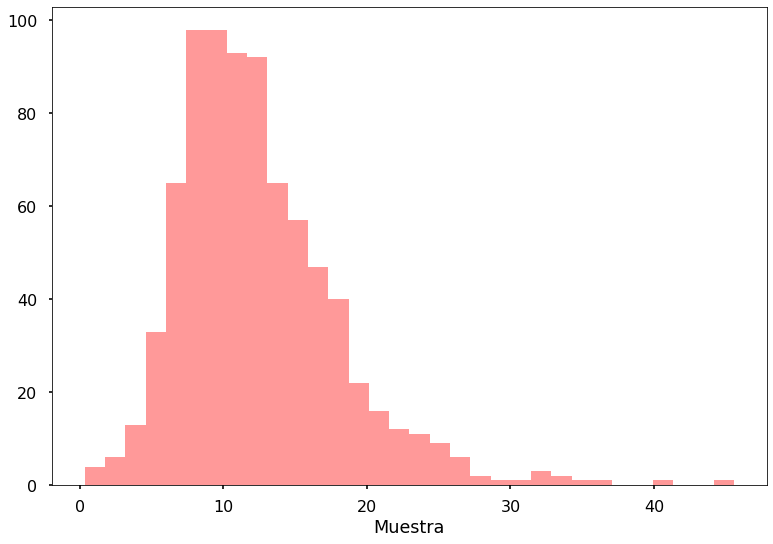

In [4]:
sns.distplot(df.t, kde= False, axlabel= "Muestra", color = "red")

### Cálculo de la función de Supervivencia

Se sabe que la muestra proviene de una variable aleatoria con función de densidad t ~ $Gumbel(\mu,\lambda)$

Para calcular la función de supervivencia primero se tiene que calcular la función de distribución. Por definición tengo:

$$\int_{-\infty}^{t} f(x) \,dx $$

El soporte de una variable aleatoria Gumbell son los reales, por lo tanto la integral no sufre modificaciones en sus límites. 

$$\int_{-\infty}^{t} \frac{1}{\lambda} exp\left(- \frac{x-\mu}{\lambda}\right ) exp\left(- exp \left( -\frac{x-\mu}{\lambda}\right )\right ) \,dx $$

Sea $ u = e^-{\frac{x-\mu}{\lambda}}\Rightarrow du = - e^{-\frac{x-\mu}{\lambda}} \frac{1}{\lambda} dx$, así (omitiré los límites hasta al momento de sustitución):

$$-\int e^{-u} \, du $$


Realizaré otro cambio de variable. Sea $v = -u \Rightarrow dv = -du$. Asi:

$$\int e^v \,dv$$

Integrando $e^v$ y volviendo a los parámetros originales, tengo:

$$e^{-e^{-\frac{x-\mu}{\lambda}}} \bigg\rvert_{-\infty}^{x} = [e^{-e^{-\frac{x-\mu}{\lambda}}} -  \lim_{x\to-\infty} e^{-e^{-\frac{x-\mu}{\lambda}}}] $$

Haciendo una pausa para analizar el límite:

$$\lim_{x\to-\infty} e^{-e^{-\frac{x-\mu}{\lambda}}}  $$

Si primero analizo lo que sucede en el exponente tendré una idea más clara de hacia dónde converge tal límite:
$$-\lim_{x\to-\infty} e^{-\frac{x-\mu}{\lambda}}$$

Primero hay que tomar en cuenta que $\mu$ puede tomar cualquier valor en los reales. Entonces $-\infty$ más/menos cualquier cosa sigue siendo $-\infty$. $\lambda$ es positiva, entonces todo el cociente es negativo multiplicado por el negativo de afuera es positivo. Pero $e^{-\infty}$ es igual a 0. Luego:

$$\lim_{x\to-\infty} e^{-e^{-\frac{x-\mu}{\lambda}}}  = 0    $$

Por lo tanto:

$$e^{-e^{-\frac{t-\mu}{\lambda}}} $$

Con esto concluyo que:

$$F(t) = \int_{-\infty}^{t} \frac{1}{\lambda} exp\left( \frac{x-\mu}{\lambda}\right ) exp\left(- exp \left( \frac{x-\mu}{\lambda}\right )\right ) \,dx  = e^{-e^{-\frac{t-\mu}{\lambda}}} $$ 

En este caso no es necesario trabajar con la función de supervivencia. Por eso:  $F(t) = e^{-e^{-\frac{t-\mu}{\lambda}}} $

$$
\begin{align*}
z = ln(S(t))\\
z = -e^{-\frac{t-\mu}{\lambda}}\\
ln(-z) = ln(e^{-\frac{t-\mu}{\lambda}})\\
ln(-z) = -\frac{t-\mu}{\lambda}\\
ln(-z) = \frac{\mu}{\lambda} - \frac{1}{\lambda}t 
\end{align*}
$$

De donde obtengo las siguientes igualdades:

$$\begin{cases} y = ln(-ln(S(t))) \\ x_1 = t \\ \beta_0 = \frac{\mu}{\lambda}\\ \beta_1 = -\frac{1}{\lambda} \end{cases}$$


C:\Users\actda\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


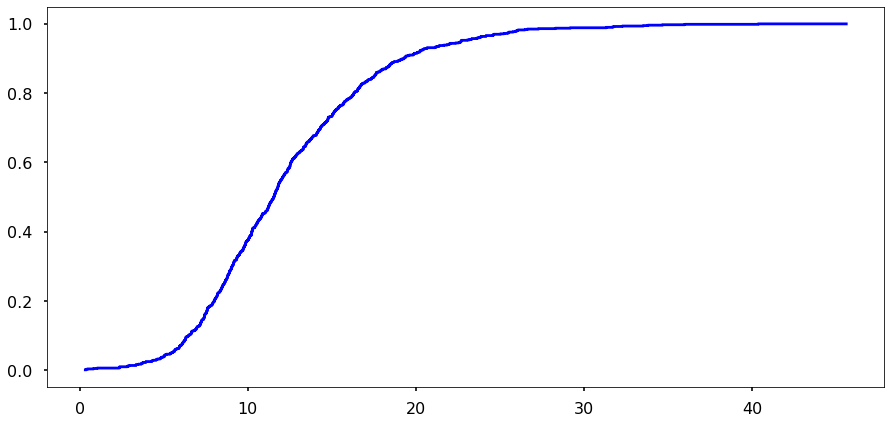

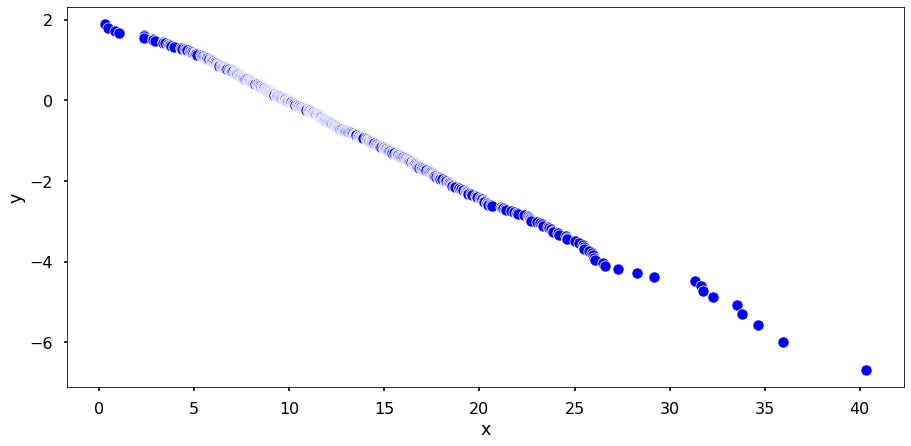

In [14]:
df_sorted = df.sort_values("t",ascending = True)
df_sorted["i"] = list(range(1,len(df_sorted)+1))
df_sorted['St'] = df_sorted['i']/len(df_sorted)
df_sorted['y'] = np.log(-1*np.log(df_sorted['St']))
df_sorted['x'] = df_sorted['t']

plt.figure(figsize=(15,7))
plt.step(df_sorted['t'],df_sorted['St'],color='Blue')
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_sorted, x="x", y="y",color='Blue')

Borraré el último registro puesto que este da una indeterminación

In [7]:
df_sorted.drop(513, inplace = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.288e+05
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:42:30   Log-Likelihood:                 1084.7
No. Observations:                 799   AIC:                            -2165.
Df Residuals:                     797   BIC:                            -2156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2997      0.005    420.007      0.000       2.289       2.310
x             -0.2324      0.000   -573.382      0.000      -0.233      -0.232
==============================================================================
Omnibus:                      295.002   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15118.473
Skew:                           0.867   Prob(JB):                         0.00
Kurtosis:                      24.240   Cond. No.                         33.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

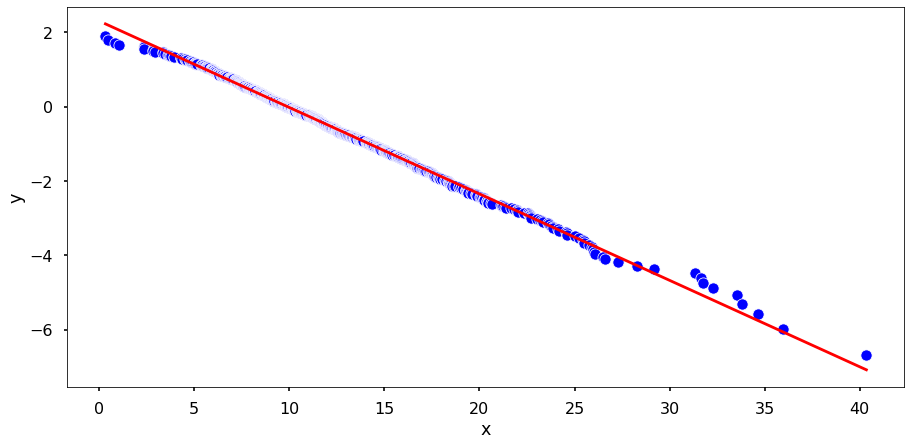

In [10]:
Yreg = df_sorted["y"]
Xreg = sm.add_constant(df_sorted["x"])
Modelo_rl = sm.OLS(Yreg,Xreg).fit()
display(Modelo_rl.summary())

beta = list(Modelo_rl.params)
X = np.linspace(min(df_sorted['x']),max(df_sorted['x']))
Y = beta[0]+beta[1]*X

plt.figure(figsize=(15,7))
sns.scatterplot(data=df_sorted, x="x", y="y",color='Blue')
plt.plot(X, Y, c='red')

Y dado que:
$$\begin{cases} \beta_0 = \frac{\mu}{\lambda}\\ \beta_1 = -\frac{1}{\lambda} \end{cases}$$

In [19]:
beta_0 = Modelo_rl.params[0]
beta_1 = Modelo_rl.params[1]

lambda_ = -1/beta_1

mu = beta_0 * lambda_

In [20]:
print("El valor de lamda es: ",lambda_, 2*"\n","El valor de mu es : ",mu)

El valor de lamda es:  4.302172633955647 

 El valor de mu es :  9.893802656973616
